<a href="https://colab.research.google.com/github/kameshcodes/IE-506---Machine-Learning_-Principle-and-Techniques/blob/main/IE506-Kernel_machines-3Mar2023-10Mar'2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Kernel machines}}$

Let us first generate a synthetic data set to illustrate the deficiency of linear support vector machines.

We shall generate $n$ samples where each sample is 2-dimensional of the form $x^i = (x^i_1,x^i_2), i \in \{1,2,\ldots,n\}$. For each sample $x^i$ we have the following labeling scheme:

$
\begin{align}
y^i = \begin{cases}
        +1 \text{ if } (x^i_1-1)^2 + (x^i_2-1)^2 < 1 \\
        -1 \text{ else. }
      \end{cases}
\end{align}
$

Hence the circle $(x^i_1-1)^2 + (x^i_2-1)^2 = 1$ (or equivalently $(x^i_1)^2 -2x^i_1 + (x^i_2)^2 -2x^i_2 = -1)$  forms a separating surface for the data.

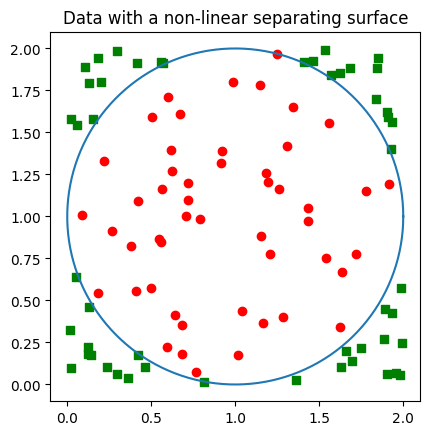

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 100

#seed the random number generator
np.random.seed(100)

X = []
y = []

radius = 1.



center_point = np.array([1.,1.])
center_x1 = center_point[0]
center_x2 = center_point[1]

#generate points within circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2>radius:
    x1 = np.random.uniform(low=0, high=2)
    x2 = np.random.uniform(low=0, high=2)

  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([1])


#generate points outside circle (x1-1)^2 + (x2-1)^2 = 1
for i in range(int(num_samples/2)):
  toss = np.random.rand()
  x1 = np.random.uniform(low=0, high=2)
  x2 = np.random.uniform(low=0, high=2)
  while (x1-center_x1)**2+(x2-center_x2)**2<=radius:
    x1 = np.random.uniform(low=0, high=2)
    x2 = np.random.uniform(low=0, high=2)

  #print('x1:',x1,'x2:',x2,(x1-center_x1)**2+(x2-center_x2)**2)
  X.append([x1,x2])
  y.append([-1])




X = np.array(X)
y = np.array(y)

#print('X:',X)
#print('y:',y)

#plot the circle
angle = np.linspace(0,2*np.pi,150)



x1 = center_x1+radius * np.cos( angle )
x2 = center_x2+radius * np.sin( angle )

figure, axes = plt.subplots(1)

axes.plot(x1,x2)
axes.set_aspect(1)


plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')


plt.title( 'Data with a non-linear separating surface' )
plt.show()

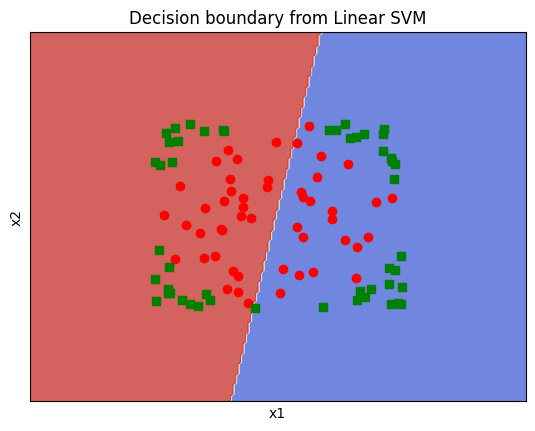

In [ ]:
#check the decision boundary obtained from Linear SVM
from sklearn.svm import LinearSVC #import linear SVM

clf = LinearSVC(C=1.0)
clf_model = clf.fit(X,y.ravel())

# create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from Linear SVM')
plt.show()


Let us now use the transformation $\Phi$ of a particular form to transform the features into a high-dimensional space hoping that the transformed data would be linearly separable.

We use the following transformation: For any $x=(x_1,x_2)$,

$
\begin{align}
\Phi(x) = \Phi( (x_1,x_2) ) = (x_1^2, x_2^2, \sqrt{2}x_1x_2, \sqrt{2}x_1, \sqrt{2}x_2, 1).
\end{align}
$

Thus suppose in the high-dimensional space, if there is a linear separator of the form $(\mathbf{w},b) = ((w_1,w_2,w_3,w_4,w_5,w_6),b)$ such that $\mathbf{w}^\top \Phi (x) + b  = 0$ is the linear separator.

We shall check if indeed for the transformed space we would have a linear separator or not.

In [ ]:
#transform the data

X_transformed = []
for i in range(num_samples):
  x1=X[i,0]
  x2=X[i,1]
  X_transformed.append([x1**2,x2**2,np.sqrt(2)*x1*x2,np.sqrt(2)*x1,np.sqrt(2)*x2,1.])

X_transformed = np.array(X_transformed)
#print(X_transformed)

clf = LinearSVC(C=10., max_iter = 10000)
clf_model = clf.fit(X_transformed,y.ravel())

predicted_labels = clf_model.predict(X_transformed)
print(predicted_labels)

train_error = np.sum(0.5*np.abs(predicted_labels-y.ravel()))/len(y)*100.0
train_accuracy = 100.0-train_error

print('train accuracy:', train_accuracy)



[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 99.0


Hence in the transformed space, we would be able to solve the hard-SVM problem:

$\begin{align}
\min_{\mathbf{w},b} & \frac{1}{2} \|\mathbf{w}\|_2^2 \nonumber \\
\text{such that } & y^i (\mathbf{w}^\top \Phi(x^i) + b) \geq 1 \ \forall i \in \{1,2,\ldots,n\}.
\end{align}
$


Then the variable $\mathbf{w}$ can be written as: $\mathbf{w} = \sum_{i=1}^{n} \lambda^i y^i \Phi(x^i)$, where $\lambda^i$ are called the Lagrange multipliers associated with the constraints in the optimization problem.

Hence during inference, for a test sample $\hat{x}$ we can use:
$
\begin{align}
\text{sign}(\mathbf{w}^\top \Phi(\hat{x}) + b) =  \text{sign} (\sum_{i=1}^{n} \lambda^i y^i \Phi(x^i)^\top \Phi(\hat{x}) + b).
\end{align}
$

Note that during inference of a test sample $\hat{x}$, we compute the dot product $\Phi(x^i)^\top \Phi(\hat{x})$ between each transformed training sample $\Phi(x^i)$ and transformed test sample $\Phi(\hat{x})$.

$\large{\text{Question:}}$ How do we find the transformation $\Phi$?





Suppose if we compute the dot product between two transformed points $\mathbf{u},\mathbf{z}$ using our previous choice for $\Phi$, we get:

$
\begin{align}
\Phi(\mathbf{u})^\top \Phi(\mathbf{z}) &= (u_1^2, u_2^2, \sqrt{2} u_1u_2, \sqrt{2} u_1, \sqrt{2} u_2, 1)^\top  (z_1^2, z_2^2, \sqrt{2} z_1z_2, \sqrt{2} z_1, \sqrt{2} z_2, 1) \\
&= u_1^2 z_1^2 + u_2^2 z_2^2 + 2 u_1 u_2 z_1 z_2 + 2 u_1 z_1 + 2 u_2 z_2 + 1 \\
&= (\mathbf{u}^\top \mathbf{z}+1)^2.
\end{align}
$

Hence the dot product between the transformed vectors in the transformed space can be represented using a transformation of the dot product between the original points in the ambient (or the original) space.

That is, we can represent $\Phi(\mathbf{u})^\top \Phi(\mathbf{z})$ as a function $K(\mathbf{u}, \mathbf{z}) = (\mathbf{u}^\top \mathbf{z}+1)^2$.

This function $K:\mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$ is called a $\textbf{kernel}$ function.  

Recall that $\mathcal{X}$ is the space of inputs.

$\large{\text{Kernel function}}$

A kernel function $K: \mathcal{X} \times \mathcal{X} \to {\mathbb{R}}$ is a function that satisfies:

$
\begin{align}
K(\mathbf{u},\mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z}) \right \rangle, \forall \mathbf{u}, \mathbf{z} \in \mathcal{X}
\end{align}
$

where $\Phi: \mathcal{X} \to \mathcal{F}$, where $\mathcal{F}$ is an appropriate feature space.


$\large{\text{Non-uniqueness of representations}}$

Suppose if we have a different transformation $\hat{\Phi}:\mathcal{X} \to \mathcal{F}$ defined as:

$
\begin{align}
\hat{\Phi}(\mathbf{u}) = (u_1^2, u_2^2,  u_1u_2, u_2u_1, \sqrt{2} u_1, \sqrt{2} u_2, 1)
\end{align}
$

then computing the dot product between two transformed points $\mathbf{u},\mathbf{z}$ using our new choice for transformation $\hat{\Phi}$, we get:

$
\begin{align}
\hat{\Phi}(\mathbf{u})^\top \hat{\Phi}(\mathbf{z}) &= (u_1^2, u_2^2, u_1u_2, u_2u_1, \sqrt{2} u_1, \sqrt{2} u_2, 1)^\top  (z_1^2, z_2^2, z_1z_2, z_2z_1, \sqrt{2} z_1, \sqrt{2} z_2, 1) \\
&= u_1^2 z_1^2 + u_2^2 z_2^2 + 2 u_1 u_2 z_1 z_2 + 2 u_1 z_1 + 2 u_2 z_2 + 1 \\
&= (\mathbf{u}^\top \mathbf{z}+1)^2.
\end{align}
$

Thus, we see that for two different feature transformations $\Phi, \hat{\Phi}$, we get the same relation between the respective inner products and the kernel function.

That is, we see that

$
\begin{align}
{\Phi}(\mathbf{u})^\top {\Phi}(\mathbf{z}) &= K(\mathbf{u},\mathbf{z}) \text{ and } \\
\hat{\Phi}(\mathbf{u})^\top \hat{\Phi}(\mathbf{z}) &= K(\mathbf{u},\mathbf{z}).  
\end{align}
$

Hence to realise the same kernel functions, the feature representations can be different.

$\large{\text{Characterization of Kernels}}$

A continuous function $K:\mathcal{X} \times \mathcal{X} \to {\mathbb{R}}$ can be decomposed as:

$
\begin{align}
K(\mathbf{u}, \mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z})  \right \rangle
\end{align}
$

described using two steps:

1. transformation using a feature map $\Phi$ into a $\textbf{Hilbert space}$ $\mathcal{F}$, where $\Phi$ is applied on both the arguments  
2. evaluation of the inner product in $\mathcal{F}$

if and only if

$K$ satisfies the finitely positive semi-definite property.

$\textbf{Finitely Positive semi-definite property}$

A function $K:\mathcal{X} \times \mathcal{X} \to {\mathbb{R}}$ satisfies the finitely positive semi-definite property if it is ${\color{red}{symmetric}}$ and the matrices formed by restriction to any finite subset of $\mathcal{X}$ are positive semi-definite.


$\large{\text{Symmetricity of $K$}}$

$K$ is called symmetric if $K(\mathbf{u}, \mathbf{z}) = K(\mathbf{z}, \mathbf{u}), \forall \mathbf{u},\mathbf{z} \in \mathcal{X}$.

$\large{\text{Checking positive definiteness of matrices formed by restriction to any finite subset of $\mathcal{X}$}}$

Consider finite $\ell \in \mathbb{N}$ and consider a subset $\mathcal{A}=\{\mathbf{u}^i\}_{i=1}^{\ell}$ where ${\mathbf{u}}^i \in {\mathcal{X}}, \forall i \in \{1,2,\ldots,\ell\}$. The kernel matrix formed by restriction to $\mathcal{A}$ is defined as:

$
\begin{align}
\mathsf{K}_{\mathcal{A}} = \begin{bmatrix}
              K({\mathbf{u}}^1,{\mathbf{u}}^1) & K({\mathbf{u}}^1,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^1,{\mathbf{u}}^\ell) \\
              K({\mathbf{u}}^2,{\mathbf{u}}^1) & K({\mathbf{u}}^2,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^2,{\mathbf{u}}^\ell) \\
              \vdots & \vdots & \ldots & \vdots \\
              K({\mathbf{u}}^\ell,{\mathbf{u}}^1) & K({\mathbf{u}}^\ell,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^\ell,{\mathbf{u}}^\ell) \\
              \end{bmatrix}.
\end{align}
$

Hence we need to check positive definiteness of matrix $\mathsf{K}_{\mathcal{A}}$.

We require that $\mathsf{K}_{\mathcal{A}}$ formed by restriction to any set of the form $\mathcal{A}$ needs to be positive semi-definite.

$\textbf{Recall:}$ A square matrix $A \in {\mathbb{R}}^{n \times n}$  is positive semi-definite if for any vector $\mathbf{v} \in {\mathbb{R}}^n$, $\left \langle \mathbf{v}, A \mathbf{v} \right \rangle \geq 0$.

Equivalently, $A$ is positive semi-definite if and only if all eigen values of $A$ are non-negative.

$\large{\text{Proof idea for Characterization of Kernels}}$

$\textbf{only if part:}$

Suppose a continuous function $K:\mathcal{X} \times \mathcal{X} \to {\mathbb{R}}$ can be decomposed as:

$
\begin{align}
K(\mathbf{u}, \mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z})  \right \rangle
\end{align}
$

described using two steps:

1. transformation using a feature map $\Phi$ into a $\textbf{Hilbert space}$ $\mathcal{F}$ applied on both the arguments  
2. evaluation of the inner product in $\mathcal{F}$

We shall show that  $K$ satisfies the finitely positive semi-definite property.


$\textbf{Rough sketch of proof of only if part:}$

First note that

$
\begin{align}
K(\mathbf{u}, \mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z})  \right \rangle
\end{align}
$

is symmetric because of symmetric nature of the inner product. Hence $K(\mathbf{u}, \mathbf{z}) = K(\mathbf{z}, \mathbf{u}), \forall \mathbf{u}, \mathbf{z} \in \mathcal{X}$.

The next property is to show positive semi-definiteness of matrix formed by restriction to any finite subset of $\mathcal{X}$.

Consider finite $\ell \in \mathbb{N}$ and consider a subset $\mathcal{A}=\{\mathbf{u}^i\}_{i=1}^{\ell}$ where ${\mathbf{u}}^i \in {\mathcal{X}}, \forall i \in \{1,2,\ldots,\ell\}$. The kernel matrix formed by restriction to $\mathcal{A}$ is defined as:

$
\begin{align}
\mathsf{K}_{\mathcal{A}} &= \begin{bmatrix}
              K({\mathbf{u}}^1,{\mathbf{u}}^1) & K({\mathbf{u}}^1,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^1,{\mathbf{u}}^\ell) \\
              K({\mathbf{u}}^2,{\mathbf{u}}^1) & K({\mathbf{u}}^2,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^2,{\mathbf{u}}^\ell) \\
              \vdots & \vdots & \ldots & \vdots \\
              K({\mathbf{u}}^\ell,{\mathbf{u}}^1) & K({\mathbf{u}}^\ell,{\mathbf{u}}^2) & \ldots & K({\mathbf{u}}^\ell,{\mathbf{u}}^\ell) \\
              \end{bmatrix} \\
              &= \begin{bmatrix}
              \left \langle \Phi({\mathbf{u}}^1),\Phi({\mathbf{u}}^1) \right \rangle  & \left \langle \Phi({\mathbf{u}}^1),\Phi({\mathbf{u}}^2) \right \rangle & \ldots & \left \langle \Phi({\mathbf{u}}^1),\Phi({\mathbf{u}}^\ell) \right \rangle \\
              \left \langle \Phi({\mathbf{u}}^2),\Phi({\mathbf{u}}^1) \right \rangle  & \left \langle \Phi({\mathbf{u}}^2),\Phi({\mathbf{u}}^2) \right \rangle & \ldots & \left \langle \Phi({\mathbf{u}}^2),\Phi({\mathbf{u}}^\ell) \right \rangle \\
              \vdots & \vdots & \ldots & \vdots \\
              \left \langle \Phi({\mathbf{u}}^\ell),\Phi({\mathbf{u}}^1) \right \rangle  & \left \langle \Phi({\mathbf{u}}^\ell),\Phi({\mathbf{u}}^2) \right \rangle & \ldots & \left \langle \Phi({\mathbf{u}}^\ell),\Phi({\mathbf{u}}^\ell) \right \rangle
              \end{bmatrix}.
\end{align}
$

$\textbf{Exercise:}$ Show that $\mathsf{K}_{\mathcal{A}}$ is positive semi-definite.

Since $\ell$ and $\mathcal{A}$ are arbitrary the only-if part of the result holds.



$\textbf{if part:}$

Suppose a continuous function $K:\mathcal{X} \times \mathcal{X} \to {\mathbb{R}}$
satisfies the finitely positive semi-definite property.

We need to show that the function $K$ can be decomposed as:

$
\begin{align}
K(\mathbf{u}, \mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z})  \right \rangle
\end{align}
$

described using two steps:

1. transformation using a feature map $\Phi$ into a $\textbf{Hilbert space}$ $\mathcal{F}$, where $\Phi$ is applied on both the arguments  
2. evaluation of the inner product in $\mathcal{F}$.

$\textbf{Rough sketch of proof of if part:}$

For proving this part, we need to construct or design a suitable $\textbf{Hilbert space}$ $\mathcal{F}$ which will act as the range for feature map $\Phi$.

Typically the space is constructed as:

$
\begin{align}
\mathcal{F} = \{f(\cdot)=\sum_{i=1}^{\ell} \alpha_i K(\mathbf{u}^i, \cdot), \ell \in {\mathbb{N}}, \alpha_i \in \mathbb{R}, \forall i \in \{1,2,\ldots,\ell\}, \mathbf{u}^i \in \mathcal{X}, \forall i \in \{1,2,\ldots,\ell\} \}.
\end{align}
$

Note that the space $\mathcal{F}$ is a space of functions defined using $K$.

Suppose if there are two elements $f = \sum_{i=1}^{\ell_1} \alpha_i K(\mathbf{u}^i, \cdot)$, $g = \sum_{j=1}^{\ell_2} \beta_j K(\mathbf{z}^j, \cdot)$, then we define the inner product $\left \langle f, g\right \rangle$ as:

$
\left \langle f, g \right \rangle = \sum_{i=1}^{\ell_1} \sum_{i=1}^{\ell_2} \alpha_i \beta_j K(\mathbf{u}^i, \mathbf{z}^j).
$

Using this definition of $\mathcal{F}$ and the inner product, it can be shown that $\mathcal{F}$ is a  Hilbert space.

Then we can construct a suitable function $\Phi$ using this Hilbert space which satisfies the property that: $K(\mathbf{u}, \mathbf{z}) = \left \langle \Phi(\mathbf{u}), \Phi(\mathbf{z})  \right \rangle$.

${\color{red}{\text{Note:}}}$ The proof details and construction of $\Phi$ are not discussed in detail here.




$\large{\text{More about the Hilbert space}}$

Note that we have constructed a Hilbert space

$
\begin{align}
\mathcal{F} = \{f(\cdot)=\sum_{i=1}^{\ell} \alpha_i K(\mathbf{u}^i, \cdot), \ell \in {\mathbb{N}}, \alpha_i \in \mathbb{R}, \forall i \in \{1,2,\ldots,\ell\}, \mathbf{u}^i \in \mathcal{X}, \forall i \in \{1,2,\ldots,\ell\} \}.
\end{align}
$

In this construction, each element of $\mathcal{F}$ is a function $f(\cdot)$ which is constructed using a finite linear combination of functions of the form $K({\mathbf{u}}, \cdot)$ where ${\mathbf{u}} \in \mathcal{X}$.

We will represent $K({\mathbf{u}}, \cdot)$ as $K_{{\mathbf{u}}}(\cdot)$.

Thus for an element ${\mathbf{u}} \in \mathcal{X}$, the function $K_{{\mathbf{u}}}(\cdot)$ is defined as a map

$
K_{{\mathbf{u}}}(\cdot): \mathcal{X} \to {\mathbb{R}}
$.

Hence each element of $\mathcal{F}$ can be considered to be formed by fundamental constituents, which are functions of the form $K_\mathbf{x}(\cdot)$ for some $\mathbf{x} \in \mathcal{X}$.

Hence the construction of $\mathcal{F}$ itself is related to the kernel function $K$ to be designed.

$\large{\text{Inner product and Reproducing property}}$

Recall that for two elements $f = \sum_{i=1}^{\ell_1} \alpha_i K(\mathbf{u}^i, \cdot)$, $g = \sum_{j=1}^{\ell_2} \beta_j K(\mathbf{z}^j, \cdot)$,  we had defined the inner product $\left \langle f, g\right \rangle$ as:

$
\left \langle f, g \right \rangle = \sum_{i=1}^{\ell_1} \sum_{i=1}^{\ell_2} \alpha_i \beta_j K(\mathbf{u}^i, \mathbf{z}^j).
$

Suppose we assume that $g(\cdot) = K_\mathbf{x}(\cdot)$ for a fixed $\mathbf{x} \in \mathcal{X}$, then from the inner product definition, we have:

$
\left \langle f, g \right \rangle = \sum_{i=1}^{\ell_1}  \alpha_i K(\mathbf{u}^i, \mathbf{x}) = f(\mathbf{x}).
$

Thus the inner product of $f(\cdot) \in \mathcal{F}$ and $K_\mathbf{x}(\cdot) \in \mathcal{F}$ results in $f(\mathbf{x})$, the evaluation of function $f$ at $\mathbf{x}$.

This property is called ${\color{blue}{\text{reproducing property}}}$.

$\large{\text{A construction of $\Phi$}}$

Using the Hilbert space $\mathcal{F}$ and the inner product defined above, an explicit construction of the transformation $\Phi$ can be provided as:

$\Phi: \mathbf{x}  \mapsto \Phi(\mathbf{x}) = K_\mathbf{x}(\cdot)$.

Thus we see that for a fixed element $\mathbf{x} \in \mathcal{X}$, the transformation $\Phi$ maps $\mathbf{x}$ into $ K_\mathbf{x}(\cdot)$ which is a function belonging to the Hilbert space $\mathcal{F}$.

Using this construction we can see that for any member $f(\cdot) \in \mathcal{F}$, we have using the reproducing property:

$
\left \langle f(\cdot), \Phi(\mathbf{x}) \right \rangle = f(\mathbf{x}).  
$

Hence using the $\Phi$ thus designed, the kernel function can now be given as:

$
K(\mathbf{x}, \mathbf{z}) = \left \langle \Phi(\mathbf{x}), \Phi(\mathbf{z}) \right \rangle.
$

___

$\large{\text{Kernel trick}}$

Fortunately, finding a suitable choice of $\Phi$ transformation can be by-passed if we can find a suitable kernel function $K$ such that the dot product $\Phi(\mathbf{u})^\top \Phi(\mathbf{z})$ can be represented as $K(\mathbf{u},\mathbf{z})$.

Indeed, this is possible using a result known as $\textbf{Mercer's theorem}$.

$\large{\text{Mercer's theorem}}$

$K$ satisfies:

$
\begin{align}
\int K(\mathbf{u}, \mathbf{z}) g(\mathbf{u}) g(\mathbf{z}) d\mathbf{u} d\mathbf{z} \geq 0
\end{align}
$

for any function $g$ satisfying $\int g^2(\mathbf{u}) d\mathbf{u} < \infty$, if and only if  $K$ corresponds to a unique transformation $\Phi$ such that $K( \mathbf{u}, \mathbf{z}) = \Phi(\mathbf{u})^\top \Phi(\mathbf{z})$.  

Several possible choices of $K$ exist. Some examples are:



*   Polynomial kernel: $K(\mathbf{u}, \mathbf{z}) = (\mathbf{u}^\top \mathbf{z} + 1)^p$
*   Gaussian kernel (or) radial basis function (rbf) kernel: $K(\mathbf{u}, \mathbf{z}) = e^{-\frac{\|\mathbf{u}-\mathbf{z}\|^2}{2\sigma^2}}$

Let us try to use the RBF kernel on our original data and check.

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',gamma=50,max_iter = 10000)
clf_model = clf.fit(X,y.ravel())

predicted_labels = clf_model.predict(X)
print(predicted_labels)

train_error = np.sum(0.5*np.abs(predicted_labels-y.ravel()))/len(y)*100.0
train_accuracy = 100.0-train_error

print('train accuracy:', train_accuracy)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
train accuracy: 100.0


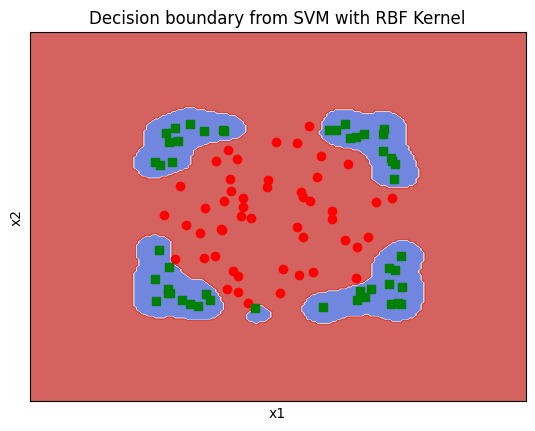

In [ ]:
# create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from SVM with RBF Kernel')
plt.show()


$\large{\text{Exercise}}$

1. Create a test data set $T$ for the synthetic data used in the discussion of kernel machines.
1. On the synthetic data generated, try RBF Kernel with $\gamma \in \{0.0001, 0.001, 0.1, 1, 25, 75, 100\}$. Plot the decision boundaries for training data obtained in each case. Explain your observations. Check the performance of kernel machine for each value of $\gamma$ on the test data set $T$ and plot the decision boundaries in the context of test data set. Indicate which $\gamma$ values give similar performance on both the train data and test data.
2. On the synthetic data generated, try polynomial kernel $K(\textbf{u},\textbf{v}) = (\textbf{u}^\top \textbf{v} + 1)^p$ with $p \in \{1,2,4,8,16,32,64,128\}$. Plot the decision boundaries for training data obtained in each case. Explain your observations. Check the performance of kernel machine for each value of $p$ on the test data set $T$ and plot the decision boundaries in the context of test data set. Indicate which $p$ values give similar performance on both the train data and test data.


$\large{\text{References}}$

1. John Shawe-Taylor and Nello Cristianini. Kernel Methods for Pattern Analysis. Illustrated edition : Cambridge University Press, 2004.

2. Christopher M. Bishop. Pattern Recognition and Machine Learning (Information Science and Statistics): Springer, 2007.